## DSC-540 Project Milestone-5
## Chitramoy Mukherjee
#### Store various source data into sqlite DB and Create visualiztion using Python plots

In [70]:
import pandas as pd
import sqlite3
import requests

In [84]:
# Load acs2017_county_data.csv data into acs2017_county_data table in dsc540.db sqlite db and display 10 rows.

# Set the csv_file_path and sqlite_db_path variable
csv_file_path = 'C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-540\\DSC-540 Project\\Milestone-2\\acs2017_county_data.csv'
sqlite_db_path = 'C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db'

# Read data from CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Connect to SQLite database
conn = sqlite3.connect(sqlite_db_path)

# Write the data to the SQLite table
df.to_sql('acs2017_county_data', conn, index=False, if_exists='replace')

# Commit and close the connection
conn.commit()
conn.close()

csv_file_path = 'acs2017_county_data.csv'
sqlite_db_path = 'C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db'

# Read data from CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Connect to SQLite database
conn = sqlite3.connect(sqlite_db_path)

# Write the data to the SQLite table
df.to_sql('acs2017_county_data', conn, index=False, if_exists='replace')

# Commit and close the connection
conn.commit()
conn.close()

# Connect to SQLite database again
conn = sqlite3.connect(sqlite_db_path)

# Select 10 rows from the table
query = "SELECT * FROM acs2017_county_data LIMIT 10;"
result = pd.read_sql_query(query, conn)

# Display the result
print(result)

# Close the connection
conn.close()


   CountyId    State           County  TotalPop    Men   Women  Hispanic  \
0      1001  Alabama   Autauga County     55036  26899   28137       2.7   
1      1003  Alabama   Baldwin County    203360  99527  103833       4.4   
2      1005  Alabama   Barbour County     26201  13976   12225       4.2   
3      1007  Alabama      Bibb County     22580  12251   10329       2.4   
4      1009  Alabama    Blount County     57667  28490   29177       9.0   
5      1011  Alabama   Bullock County     10478   5616    4862       0.3   
6      1013  Alabama    Butler County     20126   9416   10710       0.3   
7      1015  Alabama   Calhoun County    115527  55593   59934       3.6   
8      1017  Alabama  Chambers County     33895  16320   17575       2.2   
9      1019  Alabama  Cherokee County     25855  12862   12993       1.6   

   White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0   75.4   18.9     0.3  ...   0.6          1.3         2.5         25.8   
1   83.1   

In [80]:
# Exported the https://simple.wikipedia.org/wiki/List_of_U.S._states data into excel format and loaded the data into 
# us_state_detl table in dsc540.db sqlite db and display 10 rows.

# Excel file path
excel_file_path = 'C:\\Users\\14024\\OneDrive\\Desktop\\MS-DSC\\DSC-540\\DSC-540 Project\\Milestone-5\\US_state.xlsx'

# Read Excel file into a pandas DataFrame
df = pd.read_excel(excel_file_path)

# Connect to SQLite database 
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db')
cursor = conn.cursor()

# Create the table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS us_state_detl (
        State TEXT PRIMARY KEY,
        State_cd TEXT,
        Capital TEXT,
        Largest_City TEXT,
        Population INTEGER,
        Total_Area INTEGER,
        Land_Area INTEGER,
        Water_Area INTEGER,
        Number_of_Reps INTEGER
    )
''')

# Insert data into the table
df.to_sql('us_state_detl', conn, if_exists='replace', index=False)

# Select 10 rows from the table
query = "SELECT *  FROM us_state_detl limit 10;"
result = pd.read_sql_query(query, conn)

# Display the result
print(result)

# Commit changes and close the connection
conn.commit()
conn.close()


         State State_cd      Capital  Largest_City  Population  Total_Area  \
0      Alabama       AL   Montgomery    Huntsville     5024279       52420   
1       Alaska       AK       Juneau     Anchorage      733391      665384   
2      Arizona       AZ      Phoenix       Phoenix     7151502      113990   
3     Arkansas       AR  Little Rock   Little Rock     3011524       53179   
4   California       CA   Sacramento   Los Angeles    39538223      163695   
5     Colorado       CO       Denver        Denver     5773714      104094   
6  Connecticut       CT     Hartford    Bridgeport     3605944        5543   
7     Delaware       DE        Dover    Wilmington      989948        2489   
8      Florida       FL  Tallahassee  Jacksonville    21538187       65758   
9      Georgia       GA      Atlanta       Atlanta    10711908       59425   

   Land_Area  Water_Area  Number_of_Reps  
0      50645        1775               7  
1     570641       94743               1  
2     113594

In [81]:
# Load the API data (https://api.census.gov/data/2017/ecnclcust) into api_census_2017_data table in sqlite dsc540.db db
# and display 10 rows.

# Census API endpoint URL
url = "https://api.census.gov/data/2017/ecnclcust"

# API parameters
params = {
    'get': 'NAICS2017_LABEL,NAME,GEO_ID,TYPOP,TYPOP_LABEL,TAXSTAT_LABEL,TAXSTAT,RCPTOT',
    'for': 'state:*',
    'NAICS2017': '5411',
    'key': '6f54e9fd4f7eef82cba525eb1d738c0da4048c66'
}

# Fetch data from the API
response = requests.get(url, params=params)
data = response.json()

# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db')
cursor = conn.cursor()

# Create the table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS api_census_2017_data (
        NAICS2017_LABEL TEXT,
        NAME TEXT,
        GEO_ID TEXT,
        TYPOP INTEGER,
        TYPOP_LABEL TEXT,
        TAXSTAT_LABEL TEXT,
        TAXSTAT INTEGER,
        RCPTOT INTEGER,
        NAICS2017 INTEGER,
        state TEXT
    )
''')

# Insert data into the table
for row in data[1:]:
    row.append(row.pop())  # Move 'state' to the last position
    cursor.execute('''
        INSERT INTO api_census_2017_data VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', row)
    
# Select 10 rows from the table
query = "SELECT * FROM api_census_2017_data LIMIT 10;"
result = pd.read_sql_query(query, conn)

# Display the result
print(result)

# Commit changes and close the connection
conn.commit()
conn.close()


  NAICS2017_LABEL                  NAME       GEO_ID  TYPOP  \
0  Legal services                Alaska  0400000US02      0   
1  Legal services               Alabama  0400000US01      0   
2  Legal services               Wyoming  0400000US56      0   
3  Legal services              Arkansas  0400000US05      0   
4  Legal services               Arizona  0400000US04      0   
5  Legal services            California  0400000US06      0   
6  Legal services              Colorado  0400000US08      0   
7  Legal services           Connecticut  0400000US09      0   
8  Legal services  District of Columbia  0400000US11      0   
9  Legal services              Delaware  0400000US10      0   

          TYPOP_LABEL                                 TAXSTAT_LABEL TAXSTAT  \
0  All establishments  Establishments subject to federal income tax       T   
1  All establishments  Establishments subject to federal income tax       T   
2  All establishments  Establishments subject to federal income tax  

In [18]:
# Select specific columns after mergeing data from acs2017_county_data, api_census_2017_data , us_state_detl tables from 
# dsc540.db sqlite db based on state column.

# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db')  
cursor = conn.cursor()

# SQL query to merge data from three tables based on state column
query = '''
    SELECT
        census.NAICS2017_LABEL,
        census.NAME,
        census.GEO_ID,
        census.RCPTOT,
        acs.County,
        acs.TotalPop,
        acs.Carpool,
        acs.IncomePerCap,
        acs.PrivateWork,
        us.Capital,
        us.Largest_City,
        us.Population,
        us.Total_Area
    FROM
        api_census_2017_data census
    JOIN
        acs2017_county_data acs ON UPPER(TRIM(census.NAME)) = UPPER(TRIM(acs.State))
    JOIN
        us_state_detl us ON UPPER(TRIM(acs.State)) = UPPER(TRIM(us.State))
'''

# Execute the query and fetch the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# Display the first 10 rows
print(result_df.head(10))

# Close the connection
conn.close()


  NAICS2017_LABEL    NAME       GEO_ID  RCPTOT                        County  \
0  Legal services  Alaska  0400000US02  270019        Aleutians East Borough   
1  Legal services  Alaska  0400000US02  270019    Aleutians West Census Area   
2  Legal services  Alaska  0400000US02  270019        Anchorage Municipality   
3  Legal services  Alaska  0400000US02  270019            Bethel Census Area   
4  Legal services  Alaska  0400000US02  270019           Bristol Bay Borough   
5  Legal services  Alaska  0400000US02  270019                Denali Borough   
6  Legal services  Alaska  0400000US02  270019        Dillingham Census Area   
7  Legal services  Alaska  0400000US02  270019  Fairbanks North Star Borough   
8  Legal services  Alaska  0400000US02  270019                Haines Borough   
9  Legal services  Alaska  0400000US02  270019     Hoonah-Angoon Census Area   

   TotalPop  Carpool  IncomePerCap  PrivateWork Capital Largest_City  \
0      3338      5.8         31254         70.9

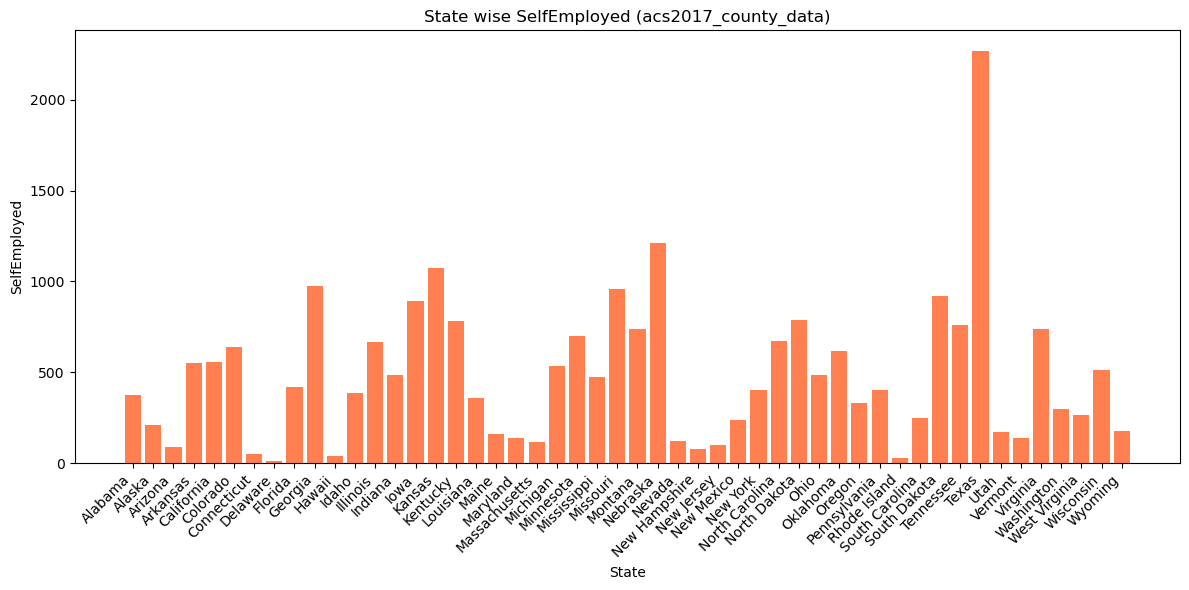

In [82]:
# Join acs2017_county_data and  us_state_detl based on State to visualize State wise SelfEmployed data using bar plot.

# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db')  
cursor = conn.cursor()

# SQL query to fetch data
query = '''
    SELECT
        SUM(c.SelfEmployed) as SelfEmployed  ,
        s.State
    FROM
        acs2017_county_data c
    JOIN
        us_state_detl s ON UPPER(TRIM(c.state)) = UPPER(TRIM(s.State))
        group by s.State
'''

# Execute the query and fetch the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(result_df['State'], result_df['SelfEmployed'], color='coral')
plt.title('State wise SelfEmployed (acs2017_county_data)')
plt.xlabel('State')
plt.ylabel('SelfEmployed')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Show the plot
plt.show()


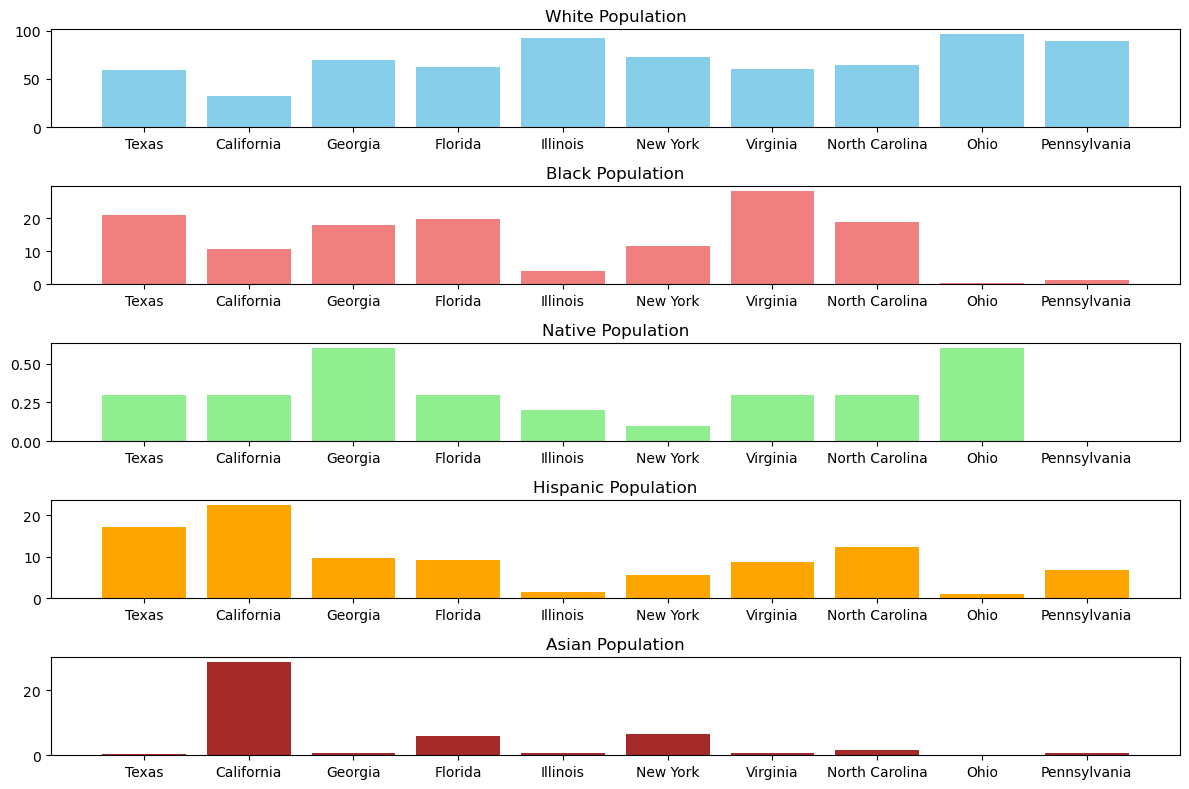

In [67]:
# Join acs2017_county_data and  us_state_detl based on State to White, Black, Native, Hispanic, Asian poplation 
# for top 10 most populated state. .

# Connect to the SQLite database
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db')  # Replace 'your_database.db' with your actual database file

# Define the SQL query to select data from the tables and join them
query = '''
    SELECT acs.State, acs.White, acs.Black, acs.Native, acs.Hispanic, acs.Asian, us_state_detl.Population
    FROM acs2017_county_data acs
    JOIN us_state_detl ON acs.State = us_state_detl.State
'''

# Execute the query and fetch the data into a DataFrame
df = pd.read_sql_query(query, conn)

# Calculate the total population for each state
df['TotalPopulation'] = df['Population'].groupby(df['State']).transform('sum')

# Sort the data by the total population in descending order and select the top 10 states
top_10_states = df.drop_duplicates(subset=['State']).nlargest(10, 'TotalPopulation')

# Plot bar diagrams for the top 10 states
plt.figure(figsize=(12, 8))

# Bar diagram for White population
plt.subplot(5, 1, 1)
plt.bar(top_10_states['State'], top_10_states['White'], color='skyblue')
plt.title('White Population')

# Bar diagram for Black population
plt.subplot(5, 1, 2)
plt.bar(top_10_states['State'], top_10_states['Black'], color='lightcoral')
plt.title('Black Population')

# Bar diagram for Native population
plt.subplot(5, 1, 3)
plt.bar(top_10_states['State'], top_10_states['Native'], color='lightgreen')
plt.title('Native Population')

# Bar diagram for Hispanic population
plt.subplot(5, 1, 4)
plt.bar(top_10_states['State'], top_10_states['Hispanic'], color='orange')
plt.title('Hispanic Population')

# Bar diagram for Asian population
plt.subplot(5, 1, 5)
plt.bar(top_10_states['State'], top_10_states['Asian'], color='brown')
plt.title('Asian Population')

plt.tight_layout()
plt.show()

# Close the database connection
conn.close()


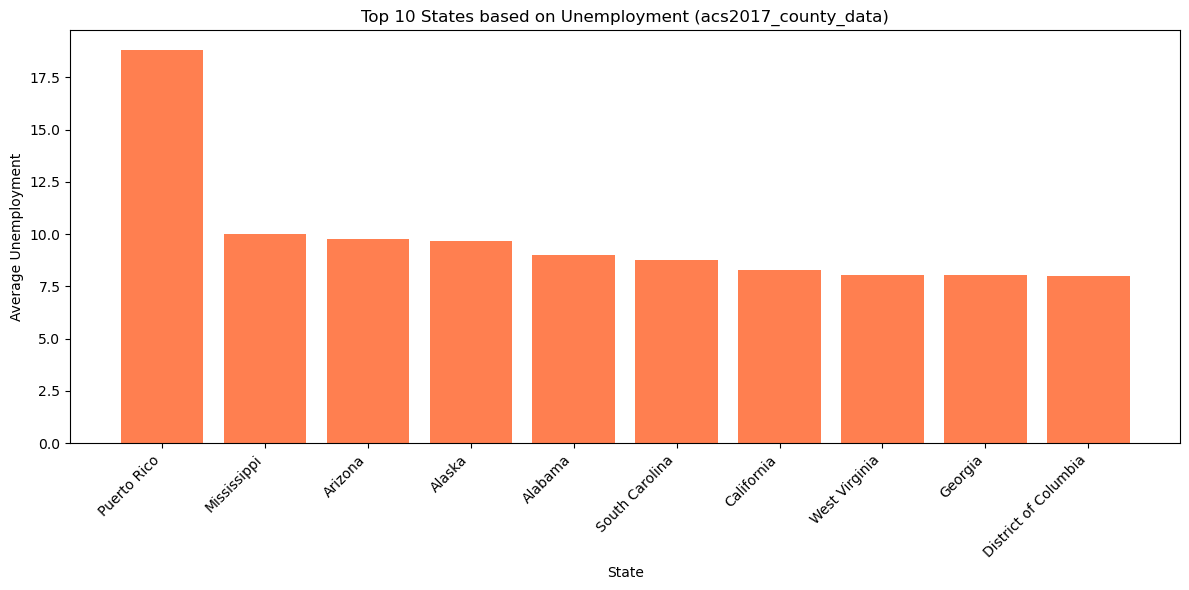

In [31]:
# Bar plot for Top 10 States based on Unemployment using acs2017_county_data data.

# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db')  
cursor = conn.cursor()

# SQL query to fetch data
query = '''
    SELECT
        State,
        AVG(Unemployment) AS AvgUnemployment
    FROM
        acs2017_county_data
    GROUP BY
        State
    ORDER BY
        AvgUnemployment DESC
    LIMIT 10
'''

# Execute the query and fetch the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(result_df['State'], result_df['AvgUnemployment'], color='coral')
plt.title('Top 10 States based on Unemployment (acs2017_county_data)')
plt.xlabel('State')
plt.ylabel('Average Unemployment')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Show the plot
plt.show()


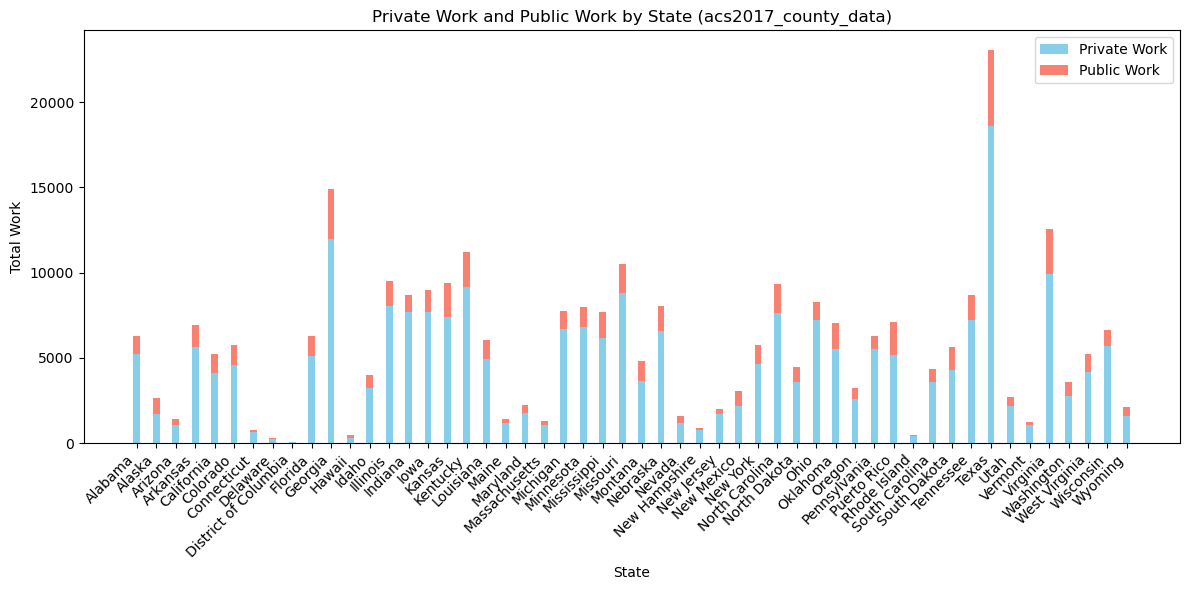

In [34]:
# Private Work and Public Work by State using acs2017_county_data data.

# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db')  
cursor = conn.cursor()

# SQL query to fetch data
query = '''
    SELECT
        State,
        SUM(PrivateWork) AS TotalPrivateWork,
        SUM(PublicWork) AS TotalPublicWork
    FROM
        acs2017_county_data
    GROUP BY
        State
'''

# Execute the query and fetch the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35

# Bar for Private Work
plt.bar(result_df['State'], result_df['TotalPrivateWork'], bar_width, label='Private Work', color='skyblue')

# Bar for Public Work
plt.bar(result_df['State'], result_df['TotalPublicWork'], bar_width, label='Public Work', color='salmon', bottom=result_df['TotalPrivateWork'])

plt.title('Private Work and Public Work by State (acs2017_county_data)')
plt.xlabel('State')
plt.ylabel('Total Work')
plt.legend()
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Show the plot
plt.show()


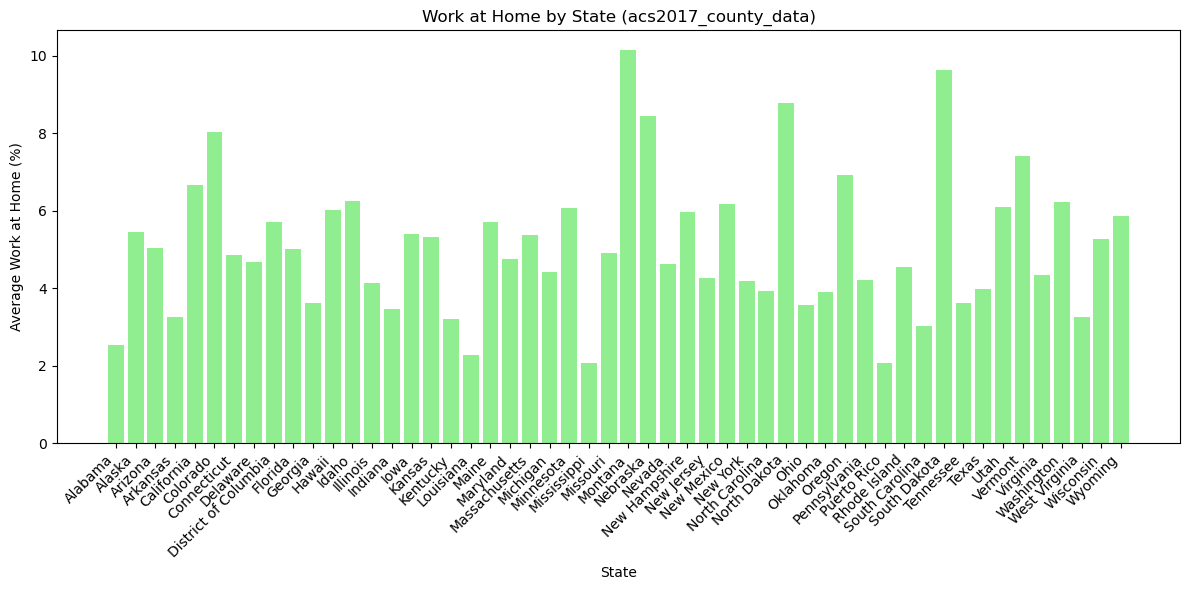

In [35]:
# Display Work at Home by State using acs2017_county_data.

# Connect to SQLite database
conn = sqlite3.connect('C:\\Users\\14024\sqllite3\\Mydatabase\\dsc540.db') 
cursor = conn.cursor()

# SQL query to fetch data
query = '''
    SELECT
        State,
        AVG(WorkAtHome) AS AvgWorkAtHome
    FROM
        acs2017_county_data
    GROUP BY
        State
'''

# Execute the query and fetch the result into a pandas DataFrame
result_df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(result_df['State'], result_df['AvgWorkAtHome'], color='lightgreen')
plt.title('Work at Home by State (acs2017_county_data)')
plt.xlabel('State')
plt.ylabel('Average Work at Home (%)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


### Leraning summary during the course of completion of the Project and Ethical Consideration :

####  1. Project topic is data wrangling and visualiztion of US Census 2017 data. As a part of this project identified 3 differnt source. Cav data from kaggle. US state related data from wikipedia and performed Census API endpoint URL call.

####  2. One of the key was  to make sure common key between all 3 data sources to make sure they can be merged finally and can be extracted from DB by joining that column for data visualiztion.

####  3. Performed basic transformations such as Null check in key column, Replace Headers, dataformating to make data readable format, identifying duplicates to avoid cross joins in future data extarction process during vizsualization and fixing casing and inconsistent values from exach data source.

#### 4. As the data sourced from verified source it doesn't need much cleansing and doesn't contain much outliers or Null in it.

#### 5. Used sqlite Db for storing data. Leraned db sqlite db installation and db table creation and storing the dataset or API's data into DB as a part of this project.

####  6. Merged 3 tables data using the same joining key and created different visualtions using the python bar plots. Visualize the different race population  for top 10 states (based on total population). Displayed States wise SelfEmployed people Unemployment using bar diagram. Created bar plot to visulaize Private Work and Public Work by State.

####  7. While identifying dataset made sure to avoid  displaying individual-level data or any information that could lead to the identification of individuals.

#### 8. Clearly communicated the methods used for data collection, processing, and visualization to enhance transparency.

#### 9. Ensured that visualizations accurately represent the underlying data.

#### 10. Was mindful of cultural nuances and sensitivities when representing demographic data, ensuring that visualizations are respectful and do not perpetuate cultural stereotypes.

#### 11. Submitted key request to access API's and use the same key during the API call to make sure sucured data access and use.

#### 12. Created visualizations on summerized data , which is very clear to everyone irrespective of basic python knowledge.

#### 13. Couldn't fetch the us_state table data from wikipedia directly into sqlite db table as the source had multiple subcolumns.

